The code is fully self-contained. 

The only requirement is to change the directory in which the data will be saved. It is important because the data downloaded will then be used in the second code.

# Data Download and Preparation

In this section of the code we will Download the 8 sectorial ETFs of the SP500 (main index for US listed stocks). 
We will then proceed to calculate the daily log returns of the ETFs and to then clean the data.

What are ETFs? "https://www.investopedia.com/terms/e/etf.asp"

[*********************100%***********************]  9 of 9 completed
C:\Users\alpor\AppData\Local\Temp\ipykernel_97540\2627749767.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.dropna(axis=1, how='all').fillna(method='ffill')
C:\Users\alpor\AppData\Local\Temp\ipykernel_97540\2627749767.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="bfill", inplace=True)
C:\Users\alpor\AppData\Local\Temp\ipykernel_97540\2627749767.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


⚠️ 'Adj Close' non available, use 'Close' instead
Available period for each asset:
Ticker
SDS    4709
XLE    4709
XLF    4709
XLI    4709
XLK    4709
XLP    4709
XLU    4709
XLV    4709
XLY    4709
dtype: int64
Ticker           SDS       XLE       XLF       XLI       XLK       XLP  \
Date                                                                     
2006-07-13       NaN       NaN       NaN       NaN       NaN       NaN   
2006-07-14  0.007052  0.011655 -0.004103 -0.014273 -0.002614 -0.009951   
2006-07-17  0.007405 -0.032876  0.001896 -0.003444  0.003137  0.002497   
2006-07-18 -0.005380  0.001250  0.002207  0.004693  0.002086  0.004561   
2006-07-19 -0.034995  0.010300  0.026113  0.020084  0.014478  0.012336   

Ticker           XLU       XLV       XLY  
Date                                      
2006-07-13       NaN       NaN       NaN  
2006-07-14  0.000000 -0.006320 -0.012977  
2006-07-17  0.002752  0.003996  0.006984  
2006-07-18  0.001526  0.000000 -0.006029  
2006-07-19  

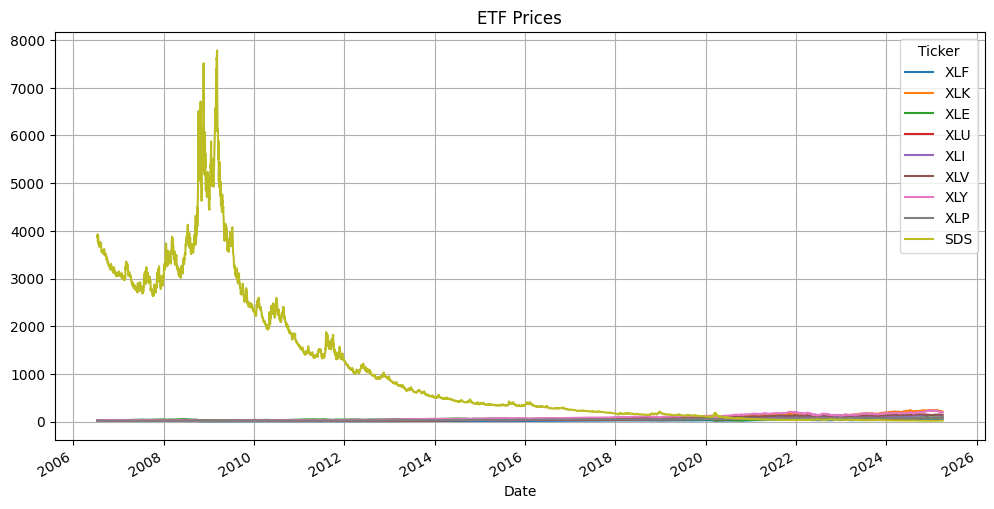

✅ Data saved in /data/v4.csv e /data/v4.csv


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ETF Tickers
tickers = ['XLF', 'XLK', 'XLE', 'XLU', 'XLI', 'XLV', 'XLY', 'XLP', 'SDS']

# Download data from Yahoo Finance

start_date = '2006-07-13' # Also works from end 1998.
# end_date = pd.Timestamp.today().strftime('%Y-%m-%d')  #used this line when I was doing the work, I had data until 2025-03-31, so I added a new line below to get my same results
end_date = '2025-04-01'

# Downloads all available data
data = yf.download(tickers, start=start_date, end=end_date)

# Checks available columns
#print("Columns available:", data.columns)

# Use 'Close' instead of 'Adj Close' if not available
if 'Adj Close' in data:
    data = data['Adj Close']
else:
    print("⚠️ 'Adj Close' non available, use 'Close' instead")
    data = data['Close']

# Rimuove eventuali colonne completamente vuote
data = data.dropna(axis=1, how='all').fillna(method='ffill')

# Verify availabilities historical data
print("Available period for each asset:")
print(data.count())

# Calculating Log Returns
# In finance is common to use log returns over normal returns because this guarantees many properties.
returns = data.pct_change().apply(lambda x: np.log1p(x))

# Fulls eventually NaNs in the dataset
data.interpolate(method="linear", inplace=True)
data.fillna(method="bfill", inplace=True)
data.fillna(method="ffill", inplace=True)

print(returns.head(5))

# Plot
data[['XLF', 'XLK', 'XLE', 'XLU', 'XLI', 'XLV', 'XLY', 'XLP', 'SDS']].plot(figsize=(12,6), title='ETF Prices')
plt.grid(True)
plt.show()

# Saving the data [IMPORTANT TO CHANGE THE DIRECTORIES]

data.to_csv(r"C:\Users\alpor\OneDrive\Desktop\politecnico\CORSI ERASMUS\MACHINE LEARNING\PROGETTO\tcn-portfolio v4\DATA\etf_prices_v4.csv")
returns.to_csv(r"C:\Users\alpor\OneDrive\Desktop\politecnico\CORSI ERASMUS\MACHINE LEARNING\PROGETTO\tcn-portfolio v4\DATA\etf_returns_v4.csv")

print("✅ Data saved in /data/v4.csv e /data/v4.csv")